# This is an Image Classifier for Flowers

In [1]:
#any edits are reloaded automatically, and also that any charts or images displayed are shown in this notebook.

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#fastai runs ontop of pytorch 1.0 and the fast V1 library
from fastai.vision import *
from fastai.metrics import error_rate

# the dataset used is of 4242 images of flowers with five seperate classes source of dataset https://www.kaggle.com/alxmamaev/flowers-recognition

In [3]:
path = Path('/home/greg/Desktop/Flower_Classifier/flowers-kaggle')

In [4]:
source_dir = '/home/greg/Desktop/Flower_Classifier/flowers-kaggle'
target_dir = '/home/greg/Desktop/Flower_Classifier/flowers-kaggle/train'
    
file_names = os.listdir(source_dir)
    
for file_name in file_names:
    shutil.move(os.path.join(source_dir, file_name), target_dir)

Error: Destination path '/home/greg/Desktop/Flower_Classifier/flowers-kaggle/train/valid' already exists

In [5]:
!mkdir /home/greg/Desktop/Flower_Classifier/flowers-kaggle/valid

mkdir: cannot create directory ‘/home/greg/Desktop/Flower_Classifier/flowers-kaggle/valid’: File exists


In [6]:
classes = os.listdir(path/'/home/greg/Desktop/Flower_Classifier/flowers-kaggle/train')

for c in classes:
    !mkdir /home/greg/Desktop/Flower_Classifier/flowers-kaggle/valid/{c}
 
from random import random

mkdir: cannot create directory ‘/home/greg/Desktop/Flower_Classifier/flowers-kaggle/valid/tulip’: File exists
mkdir: cannot create directory ‘/home/greg/Desktop/Flower_Classifier/flowers-kaggle/valid/rose’: File exists
mkdir: cannot create directory ‘/home/greg/Desktop/Flower_Classifier/flowers-kaggle/valid/sunflower’: File exists
mkdir: cannot create directory ‘/home/greg/Desktop/Flower_Classifier/flowers-kaggle/valid/flowers’: File exists
mkdir: cannot create directory ‘/home/greg/Desktop/Flower_Classifier/flowers-kaggle/valid/valid’: File exists
mkdir: cannot create directory ‘/home/greg/Desktop/Flower_Classifier/flowers-kaggle/valid/dandelion’: File exists
mkdir: cannot create directory ‘/home/greg/Desktop/Flower_Classifier/flowers-kaggle/valid/daisy’: File exists


In [7]:
for c in classes:
    for img in os.listdir(path/'/home/greg/Desktop/Flower_Classifier/flowers-kaggle/train'/c):
        if random() < 0.2:
            !mv /home/greg/Desktop/Flower_Classifier/flowers-kaggle/train/{c}/{img} /home/greg/Desktop/Flower_Classifier/flowers-kaggle/valid/{c}/{img}

In [8]:
#check if your images have moved properly
for c in classes:
    imgs = os.listdir(path/'/home/greg/Desktop/Flower_Classifier/flowers-kaggle/train'/c)
    print(c, (len(imgs)))
    imgs = os.listdir(path/'/home/greg/Desktop/Flower_Classifier/flowers-kaggle/valid'/c)
    print(c, (len(imgs)))

tulip 224
tulip 106
rose 166
rose 87
sunflower 171
sunflower 74
flowers 1
flowers 1
valid 3
valid 3
dandelion 243
dandelion 102
daisy 144
daisy 93


['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


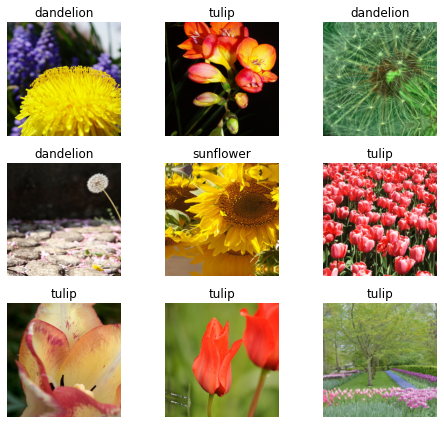

In [9]:
bs = 64
path = Path('/home/greg/Desktop/Flower_Classifier/flowers-kaggle')
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224, bs=bs)
data.normalize(imagenet_stats)

#look at class labels ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
print(data.classes)

data.show_batch(rows=3, figsize=(7,6))

In [10]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.951931,0.380702,0.895222,00:15
1,0.535811,0.323962,0.912406,00:13
2,0.343799,0.300090,0.911567,00:14
3,0.240867,0.293814,0.912825,00:13
